In [1]:
# импортируем постоянно нужные пакеты
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Задание 3

1. Повторение: применить профилирование к Титанику
2. Применить классификацию к своему датасету. Посчитать accuracy.
3. Сконструировать новый признак для своего датасета. Посчитать accuracy классификации по данным с новым признаком.

## 1. Повторение: применить профилирование к Титанику


In [2]:
!pip list | grep profiling
!pip install 'ydata-profiling'

# классический датасет классификации - пассажиры Титаника
!wget -c https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

df = pd.read_csv('titanic.csv')

from ydata_profiling import ProfileReport
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

## 2. Применить классификацию к своему датасету

In [3]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d mssmartypants/rice-type-classification

! unzip rice-type-classification.zip

Saving kaggle.json to kaggle.json
  0% 0.00/888k [00:00<?, ?B/s]
100% 888k/888k [00:00<00:00, 139MB/s]
Archive:  rice-type-classification.zip
  inflating: riceClassification.csv  


In [4]:
df = pd.read_csv('riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [6]:
print(df["Class"].nunique())

2


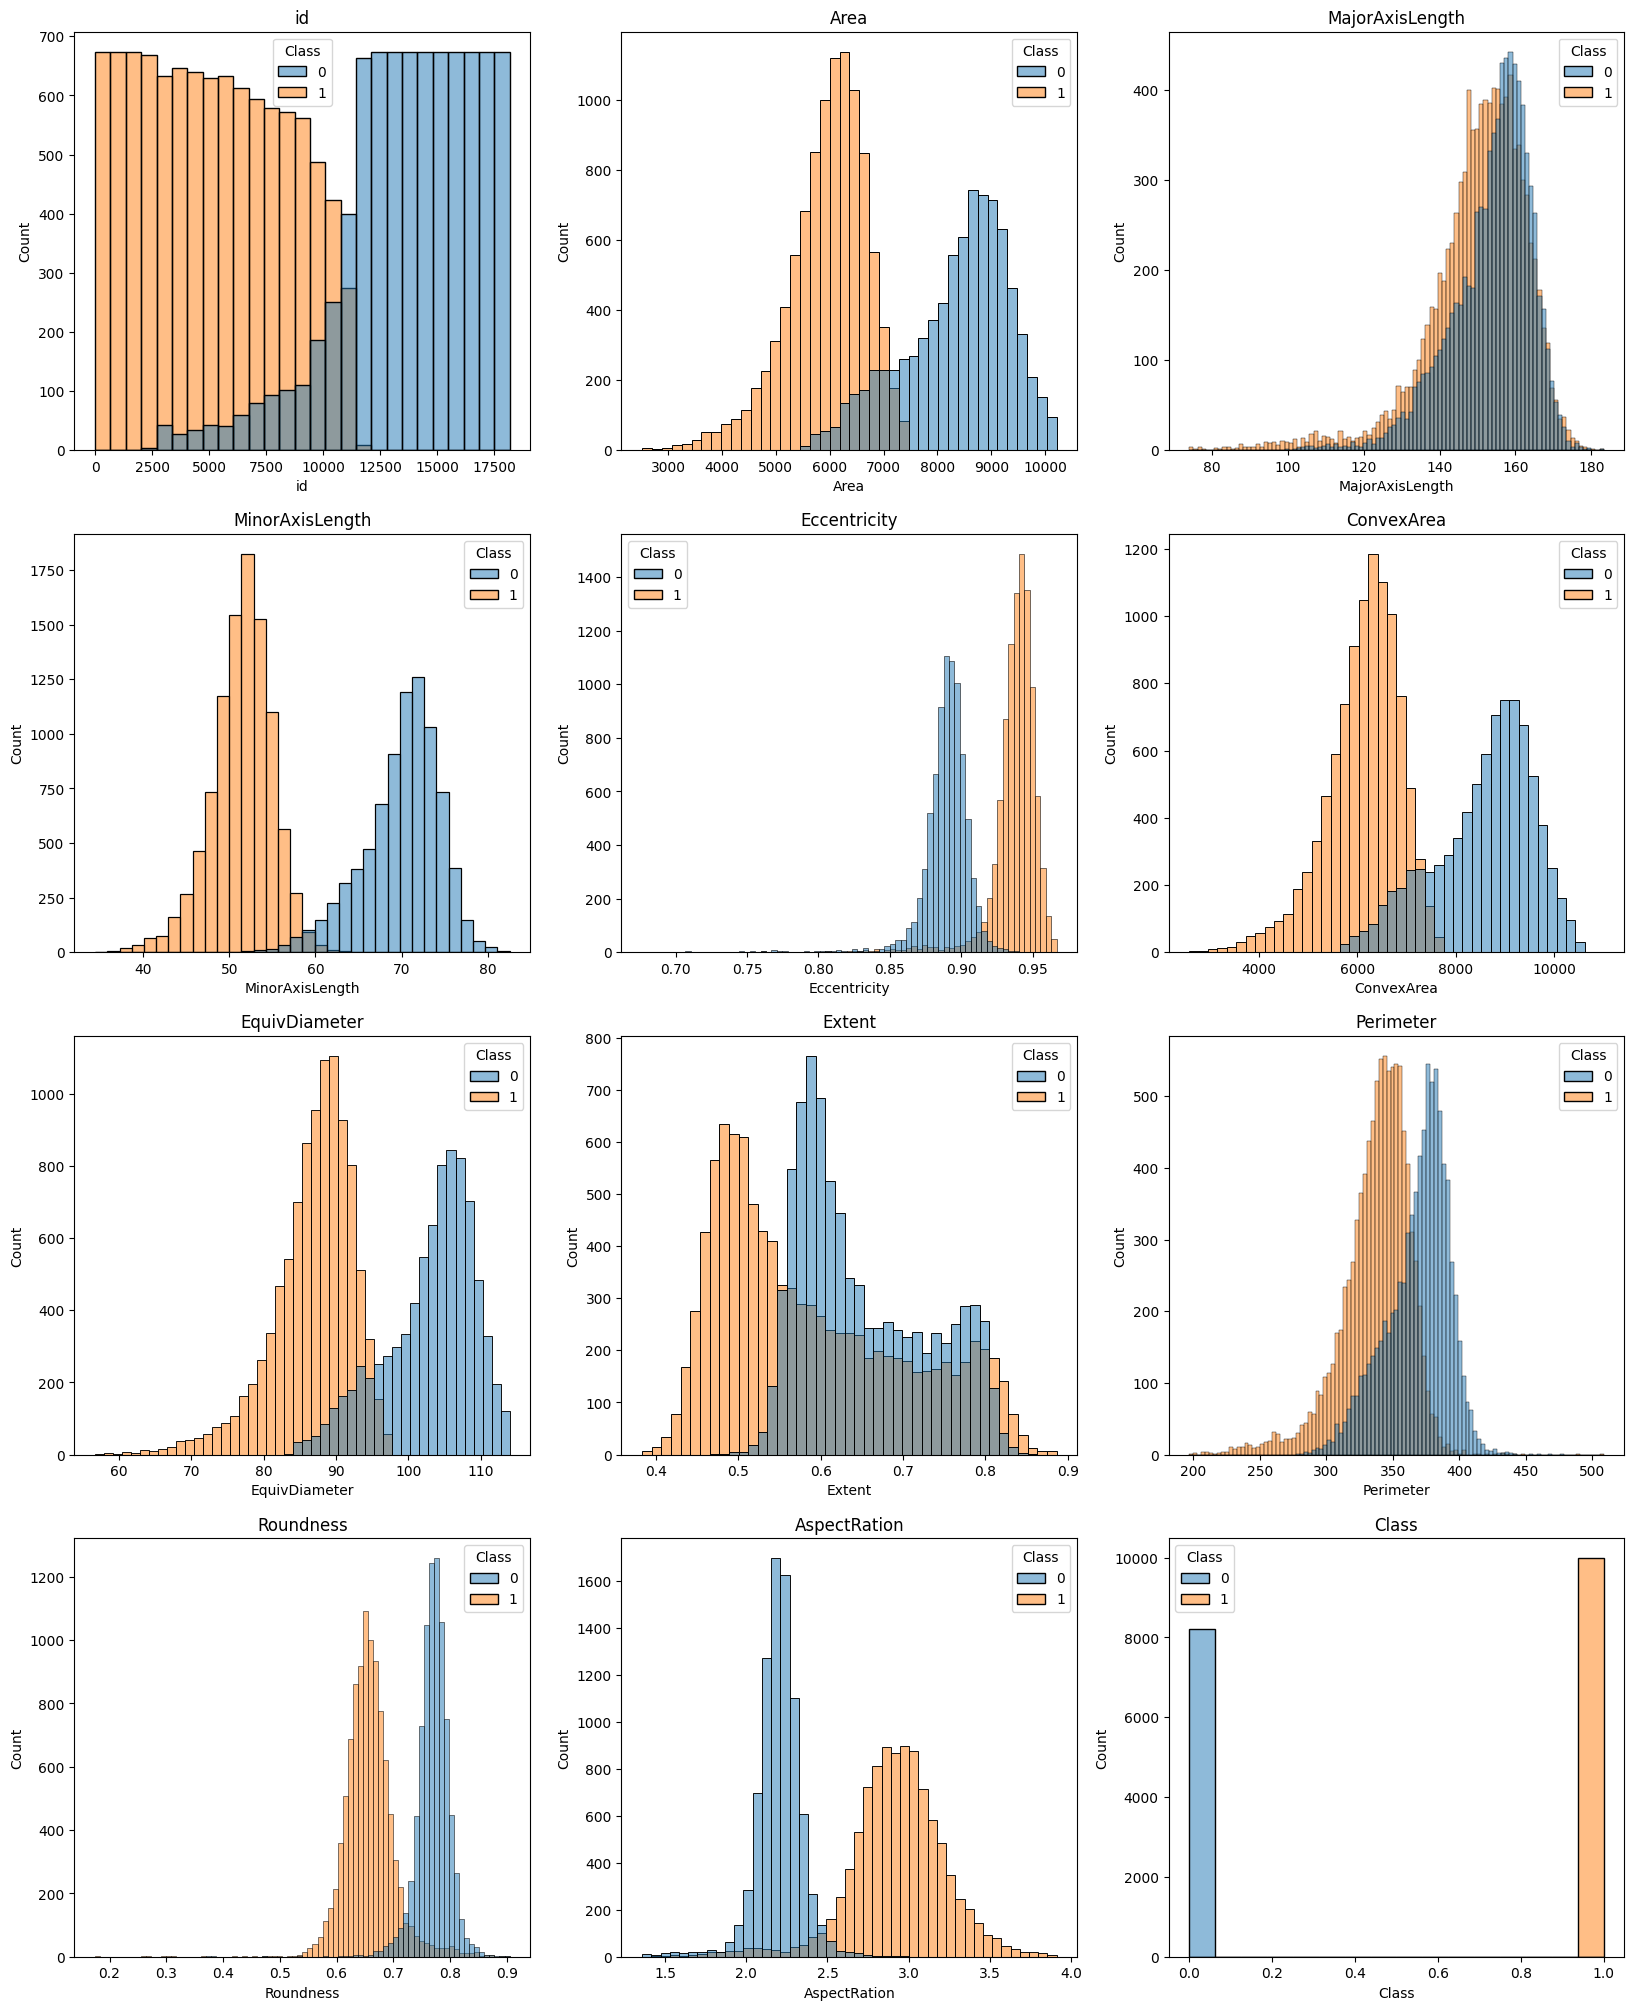

In [7]:
plt.figure(figsize=(20,25))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=df, x=df.columns[i],hue="Class")
    plt.title(df.columns[i])
plt.show()

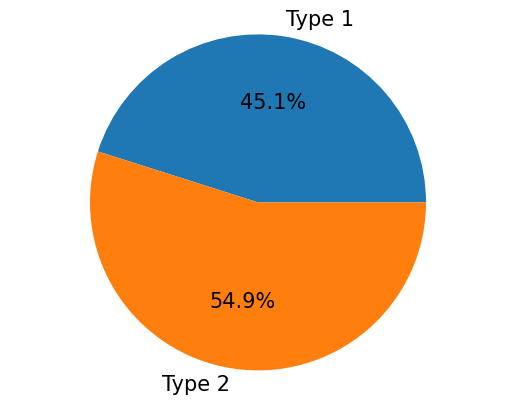

In [8]:
my_data = [df.loc[df["Class"]==0].shape[0], df.loc[df["Class"]==1].shape[0]]  #percentages
my_labels = 'Type 1','Type 2' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')

plt.show()

### Метод k-ближайших соседей

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
k = 1000
model = KNeighborsClassifier(n_neighbors=k)

In [30]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Посчитать accuracy

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.81%


# Задание 4

1. Применить один из бустовых классификаторов к своей собственной задаче классификации, визуализировать оценку важности признаков

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# import pandas as pd

# feature_names = model.feature_names

In [24]:
feature_names = df.columns.tolist()

del feature_names[0]

In [25]:
feature_names

['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Perimeter',
 'Roundness',
 'AspectRation',
 'Class']

In [26]:
# Далее мы создадим объект GradientBoostingClassifier и обучим его на обучающем наборе данных
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

## визуализировать оценку важности признаков

In [27]:
# Чтобы визуализировать оценку важности признаков, мы можем создать датафрейм с именами признаков и соответствующими значениями важности:
feature_importance = pd.DataFrame({'feature_name': feature_names, 'importance': clf.feature_importances_})
print(feature_importance)

       feature_name    importance
0              Area  5.696670e-02
1   MajorAxisLength  1.458927e-15
2   MinorAxisLength  2.325481e-15
3      Eccentricity  9.429728e-01
4        ConvexArea  6.882148e-07
5     EquivDiameter  5.116440e-05
6            Extent  3.011243e-17
7         Perimeter  1.337549e-16
8         Roundness  2.233739e-16
9      AspectRation  6.179747e-06
10            Class  2.468711e-06


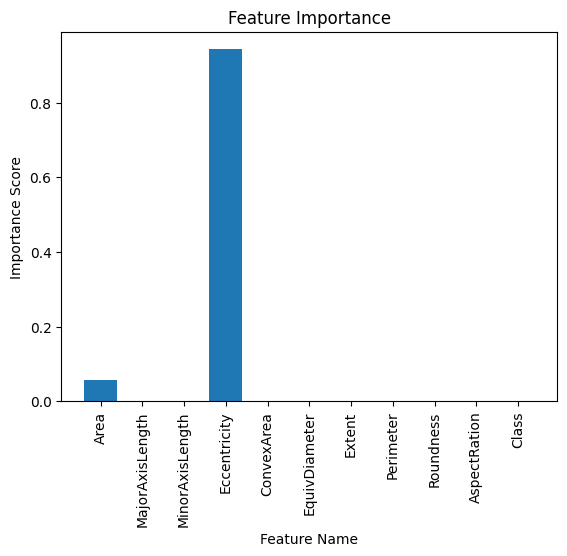

In [28]:
# Мы можем построить столбчатую диаграмму для визуализации оценки важности признаков:
import matplotlib.pyplot as plt 

plt.bar(feature_importance['feature_name'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()